# Games #

### Описание проекта ###
Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

**Цель исследования.** Дать рекомендации магазину "Стримчик" для рекламной компании на 2017 год.

**Задачи исследования:**
1) Провести предобработку данных: заменить названия столбцов, преобразовать данные в нужные типы, обработать пропуски и дубликаты.

2) Провести исследовательский анализ данных: взять актуальный по времени срез данных, проанализировать распределение продаж по платформам и жанрам, исследовать взаимосвязь между продажами и оценками критиков и пользователей.

3) Составить портрет пользователей по регионам.

4) Проверить статистические гипотезы.

**Исходные данные**. Датафрейм, состоящий из 11 столбцов и 16715 строк с данными типов float и object. Присутствует много пропусков в столбцах с оценками критиков и пользователей и возрастным рейтингом.

**Данное исследование разделим на несколько частей**.

[Шаг 1. Открытие файла](#step1)

Шаг 2. Подготовка данных:
* [2.1 Работа с пропусками и типами данных.](#step2_1)
* [2.2 Работа с дубликатами.](#step2_2)

Шаг 3. Исследовательский анализ данных
* [3.1 Поиск подходящего среза](#step3_1)
* [3.2 Диаграмма ящик с усами](#step3_2)
* [3.3 Влияние отзывов на продажи](#step3_3)
* [3.4 Распределение игр по жанрам](#step3_4)

[Шаг 4. Портрет пользователей по регионам.](#step4)

[Шаг 5. Проверка гипотез](#step5)

[Шаг 6. Общий вывод](#step6)


## Шаг 1. Открытие файла ##

<a id='step1'></a>


Выводы по разделу:

В данном разделе мы открыли файл и представили его структуру. Таблица состоит из 11 столбцов и 16715 строк с данными типов float и object. Присутствует много пропусков в столбцах с оценками критиков и пользователей и возрастным рейтингом. В связи с чем, в следующем разделе предстоит провести предобработку данных, а именно привести названия столбцов к нижнему регистру, разобраться с пропусками, изменить типы данных, где необходимо.


In [1]:
from scipy import stats as st
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline

In [2]:
def read_file(file_name):
    path1 = os.path.join('/datasets', file_name)
    path2 = os.path.join(file_name)
    if os.path.exists(path1):
        data = pd.read_csv(path1)
        return data
    elif os.path.exists(path2):
        data = pd.read_csv(path2)
        return data
    else:
        print('File is not found')

In [3]:
data = read_file('games.csv')

In [4]:
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


## Шаг 2. Подготовка данных ## 

На данном этапе мы провели работу с пропусками и типами данных, а также убрали несколько неявных дубликатов. Это необходимо нам для дальнейшего исследовательского анализа. 


<a id='step2_1'></a>

**Работа с пропусками и типами данных:**
* 2 строки с пропусками в столбце **name и genre**, относятся к игре, вышедшей в 1993 году. Удаление этих строк никак не повлияет на результаты исследования. Эти значения носят случайный характер, возможно, что человек пропустил эти 2 строчки или произошел сбой при копировании. Механизм формирования пропусков: **MCAR**. Метод обработки пропусков - Complete-case Analysis.

* **year_of_release**. Механизм формирования пропусков: **MCAR**. 269 строк с пустым значением. Для прогнозирования выручки на 2017 год нас должны интересовать "свежие" платформы (PS4, XOne, PSV) - пропусков в строках с данными платформами немного, поэтому можем от них избавиться - метод обработки пропусков - Complete-case Analysis. **Также сразу заменим формат на int**.

* **user_score**. В данном столбце интерес вызывает значение tbd, встречающееся в 2376 строках. tbd означает, что значение требует уточнения, то есть его в данный момент нет, заменим их на nan. Если игра вышла в 2016 году, то возможно оценки пользоватлей еще появятся, таких строк всего 34. **Поменяем тип данных на float**.
* Nan в столбцах **user_score, critic_score**, rating. Механизм формирования пропусков: **MNAR** - пропуски в данных столбцах связаны друг с другом. Если есть nan в одном из столбцов, то скорее всего он будет и в двух других, но мы не имеем данных, чтобы точно установить причину этих пропусков. Пропущенных значений - очень много, удалить их, не повредив датафрейм, мы не можем, заменить на среднее/медиану в данном случае так же будет некорректно применим метод обработки пропусков - Available-case analysis, оставим их, как есть.


In [6]:
data.columns = data.columns.str.lower()

In [7]:
data.loc[data['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [8]:
data.shape

(16715, 11)

In [9]:
data.dropna(subset=['name'], inplace=True)
data.reset_index(drop=True, inplace=True)

In [10]:
data.shape

(16713, 11)

In [11]:
data.loc[data['year_of_release'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16371,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16403,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16446,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16456,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [12]:
data.loc[data['year_of_release'].isna(), 'platform'].value_counts()

PS2     34
Wii     34
X360    30
DS      30
PS3     25
XB      21
2600    17
PC      17
PSP     16
GC      14
GBA     11
3DS      8
PS       7
N64      3
GB       1
PSV      1
Name: platform, dtype: int64

In [13]:
data.shape

(16713, 11)

In [14]:
data.dropna(subset=['year_of_release'], inplace=True)
data.reset_index(drop=True, inplace=True)
data['year_of_release'] = data['year_of_release'].astype('int')

In [15]:
data.shape

(16444, 11)

Разберемся со значением tbd в столбце с очками пользователей:

In [16]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [17]:
data['user_score'].value_counts()

tbd    2376
7.8     322
8       285
8.2     276
8.3     252
       ... 
1.1       2
1.9       2
9.6       2
0         1
9.7       1
Name: user_score, Length: 96, dtype: int64

In [18]:
data.loc[data['user_score'] == 'tbd']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
300,Namco Museum: 50th Anniversary,PS2,2005,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
516,Zumba Fitness 2,Wii,2011,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
639,uDraw Studio,Wii,2010,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
709,Just Dance Kids,Wii,2010,Misc,1.52,0.54,0.0,0.18,NaN,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16424,Planet Monsters,GBA,2001,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16426,Bust-A-Move 3000,GC,2003,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16427,Mega Brain Boost,DS,2008,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16433,Plushees,DS,2008,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


In [19]:
data.loc[(data['user_score'] == 'tbd') & (data['year_of_release']==2016), 'user_score'].count()

34

In [20]:
data['user_score'] = pd.to_numeric(data['user_score'], errors='coerce')

Попробуем разобраться, чем вызвано большое количество пропусков в столбце с очками пользователей.

Создадим переменную, в которой будут заключены строки с nan в очках пользователей для того, чтобы ознакомиться со структурой.

In [21]:
user_na = data.loc[data['user_score'].isna()]

В результате чего, мы можем увидеть, что если есть пропуск в значении с очками пользователей, то в большинстве случаев будет nan и в столбцах с рейтингом и очками критиков.

In [22]:
user_na.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8981 entries, 1 to 16443
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             8981 non-null   object 
 1   platform         8981 non-null   object 
 2   year_of_release  8981 non-null   int32  
 3   genre            8981 non-null   object 
 4   na_sales         8981 non-null   float64
 5   eu_sales         8981 non-null   float64
 6   jp_sales         8981 non-null   float64
 7   other_sales      8981 non-null   float64
 8   critic_score     1089 non-null   float64
 9   user_score       0 non-null      float64
 10  rating           2388 non-null   object 
dtypes: float64(6), int32(1), object(4)
memory usage: 806.9+ KB


In [23]:
data.loc[data['user_score'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16439,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16440,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16441,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16442,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [24]:
data.loc[data['user_score'].isna(), 'platform'].value_counts()

DS      1609
PS      1031
PS2      907
PSP      775
Wii      738
GBA      560
PS3      445
3DS      341
N64      316
PSV      287
X360     287
SNES     239
XB       232
PC       202
GC       185
SAT      173
PS4      135
2600     116
NES       98
GB        97
XOne      65
WiiU      47
DC        38
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: platform, dtype: int64

Соотнеся общее количество игр и количество игр без отзывов, мы можем заметить, что до 2000 года практически все игры были без отзывов, вероятно на тот момент не существовало интернет-площадок, где люди могли высказать свое мнение. Затем практически с каждым годом ситуация улучшалась вплоть до 2010. В 2016 году таких игр было 41% - рассмотрим данный срез.

In [25]:
data.loc[data['user_score'].isna(), 'year_of_release'].value_counts()/data['year_of_release'].value_counts()

1980    1.000000
1981    1.000000
1982    1.000000
1983    1.000000
1984    1.000000
1985    0.928571
1986    1.000000
1987    1.000000
1988    0.933333
1989    1.000000
1990    1.000000
1991    1.000000
1992    0.976744
1993    1.000000
1994    0.991736
1995    1.000000
1996    0.969582
1997    0.937716
1998    0.918206
1999    0.908284
2000    0.694286
2001    0.466805
2002    0.440290
2003    0.334194
2004    0.358268
2005    0.379127
2006    0.451292
2007    0.474520
2008    0.536790
2009    0.569425
2010    0.627888
2011    0.558979
2012    0.480858
2013    0.441176
2014    0.433735
2015    0.509901
2016    0.478088
Name: year_of_release, dtype: float64

Нельзя с точностью сказать, чем обусловлено наличие пропусков в данных строках. Мы можем только увидеть, что наличие пропусков в данных трех столбцах взаимосвязаны.

In [26]:
user_na_2016 = data.loc[(data['user_score'].isna() & (data['year_of_release']==2016))]
user_na_2016.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
108,Pokemon Sun/Moon,3DS,2016,Role-Playing,2.98,1.45,2.26,0.45,NaN,NaN,NaN
1203,Ratchet & Clank (2016),PS4,2016,Platform,0.50,0.76,0.04,0.24,NaN,NaN,NaN
1262,Doom (2016),PS4,2016,Shooter,0.54,0.69,0.02,0.24,NaN,NaN,NaN
1452,Yokai Watch 3,3DS,2016,Action,0.00,0.00,1.33,0.00,NaN,NaN,NaN
1461,The Elder Scrolls V: Skyrim,PS4,2016,Role-Playing,0.48,0.59,0.04,0.21,NaN,NaN,NaN


In [27]:
user_na_2016.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 240 entries, 108 to 16443
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             240 non-null    object 
 1   platform         240 non-null    object 
 2   year_of_release  240 non-null    int32  
 3   genre            240 non-null    object 
 4   na_sales         240 non-null    float64
 5   eu_sales         240 non-null    float64
 6   jp_sales         240 non-null    float64
 7   other_sales      240 non-null    float64
 8   critic_score     5 non-null      float64
 9   user_score       0 non-null      float64
 10  rating           34 non-null     object 
dtypes: float64(6), int32(1), object(4)
memory usage: 21.6+ KB


*Также я считаю нужным привести рейтинг пользовтелей и рейтинг критиков к единой шкале (от 0 до 10) - сделаем это.*

In [28]:
data['critic_score'] = data['critic_score']/10

**Создадим столбцы с суммарными продажами для регионов.**

In [29]:
data['sum_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

<a id='step2_2'></a>
     
**Работа с дубликатами:**
     
**Явные дубликаты.** Явных дубликатов не обнаружено

**Неявные дубликаты.** В нашем случае возможно, что одна игра выходила несколько раз на одну и ту же платформу, тогда и строк для нее будет несколько. У нас получилось 3 таких строки, удалим их
     
 

Проведем поиск явных дубликатов:

In [30]:
data.duplicated().sum()

0

Проведем поиск неявных дубликатов.

In [31]:
data.duplicated(subset=['name', 'platform']).sum()

3

In [32]:
data.loc[data.duplicated(subset=['name', 'platform'])]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
1574,Need for Speed: Most Wanted,X360,2005,Racing,1.0,0.13,0.02,0.10,8.3,8.5,T,1.25
11534,Need for Speed: Most Wanted,PC,2012,Racing,0.0,0.06,0.00,0.02,8.2,8.5,T,0.08
15969,Madden NFL 13,PS3,2012,Sports,0.0,0.01,0.00,0.00,8.3,5.5,E,0.01


In [33]:
data.loc[data['name']=='Madden NFL 13']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
503,Madden NFL 13,X360,2012,Sports,2.53,0.15,0.0,0.17,8.1,5.8,E,2.85
600,Madden NFL 13,PS3,2012,Sports,2.11,0.22,0.0,0.23,8.3,5.5,E,2.56
3933,Madden NFL 13,Wii,2012,Sports,0.47,0.00,0.0,0.03,NaN,7.3,E,0.50
5800,Madden NFL 13,PSV,2012,Sports,0.28,0.00,0.0,0.02,6.3,7.3,E,0.30
6956,Madden NFL 13,WiiU,2012,Sports,0.21,0.00,0.0,0.02,7.5,6.7,E,0.23
15969,Madden NFL 13,PS3,2012,Sports,0.00,0.01,0.0,0.00,8.3,5.5,E,0.01


In [34]:
data = data.drop_duplicates(subset=['name', 'platform'], keep='first')


In [35]:
data.duplicated(subset=['name', 'platform']).sum()

0

## Шаг 3. Исследовательский анализ данных ##



Для начала посмотрим, сколько игр выпускалось по годам:
<a id='step3_1'></a>

In [36]:
data['year_of_release'].describe()

count    16441.000000
mean      2006.485676
std          5.875735
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2016.000000
Name: year_of_release, dtype: float64

*Будем брать данные, начиная с 25% квартили - 2003 года*

Посмотрим, на какие платформы и какое количество игр выпускалось с 2003 года:

In [37]:
pivot_plat_amount = data.query('year_of_release >= 2003').pivot_table(index='platform', values='sum_sales', aggfunc='count')\
.sort_values(by='sum_sales', ascending=False)
plat_amount = pivot_plat_amount.index[:8].tolist()


В данном случае мы рассматриваем игры в контексте платформ, игре, к примеру, вышедшей на PS3 и X360, должны принадлежать несколько строк. Если мы удалим дубликаты, останется строка только с одной платформой, и результат будет некорректным, как будто игра на другой платформе не выходила и продаж по ней не было. 


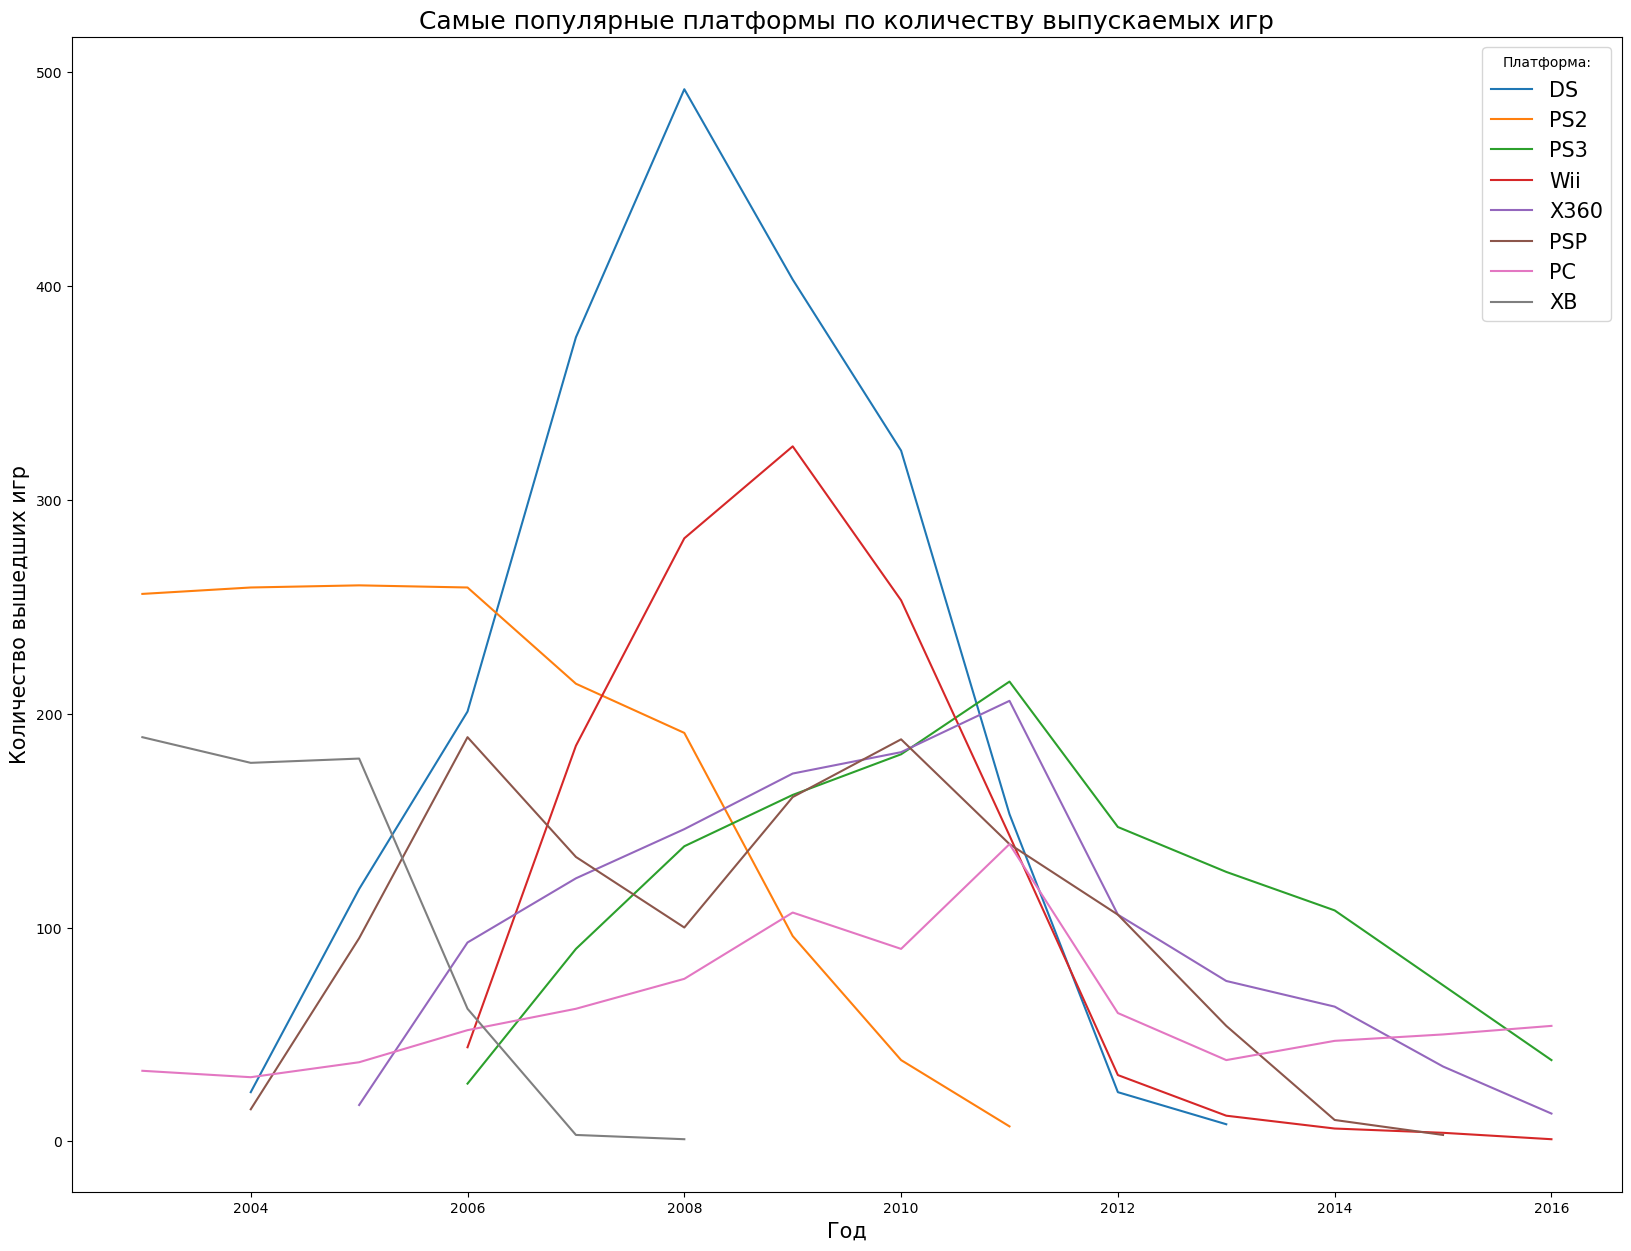

In [38]:
for platf in plat_amount:
    data.query('year_of_release >= 2003').loc[data['platform']==platf].groupby('year_of_release')['name'].count()\
    .plot(y='count', figsize=(20, 15))
    plt.title('Самые популярные платформы по количеству выпускаемых игр', fontsize=18)
    plt.legend(plat_amount, fontsize=15, title='Платформа:')
    plt.xlabel('Год', fontsize=15)
    plt.ylabel('Количество вышедших игр', fontsize=15)

In [39]:
pivot_plat_sum = data.query('year_of_release >= 2003')\
                     .pivot_table(index='platform', values='sum_sales', aggfunc='sum')\
                     .sort_values(by='sum_sales', ascending=False)
plat_sum = pivot_plat_sum.index[:8].tolist()


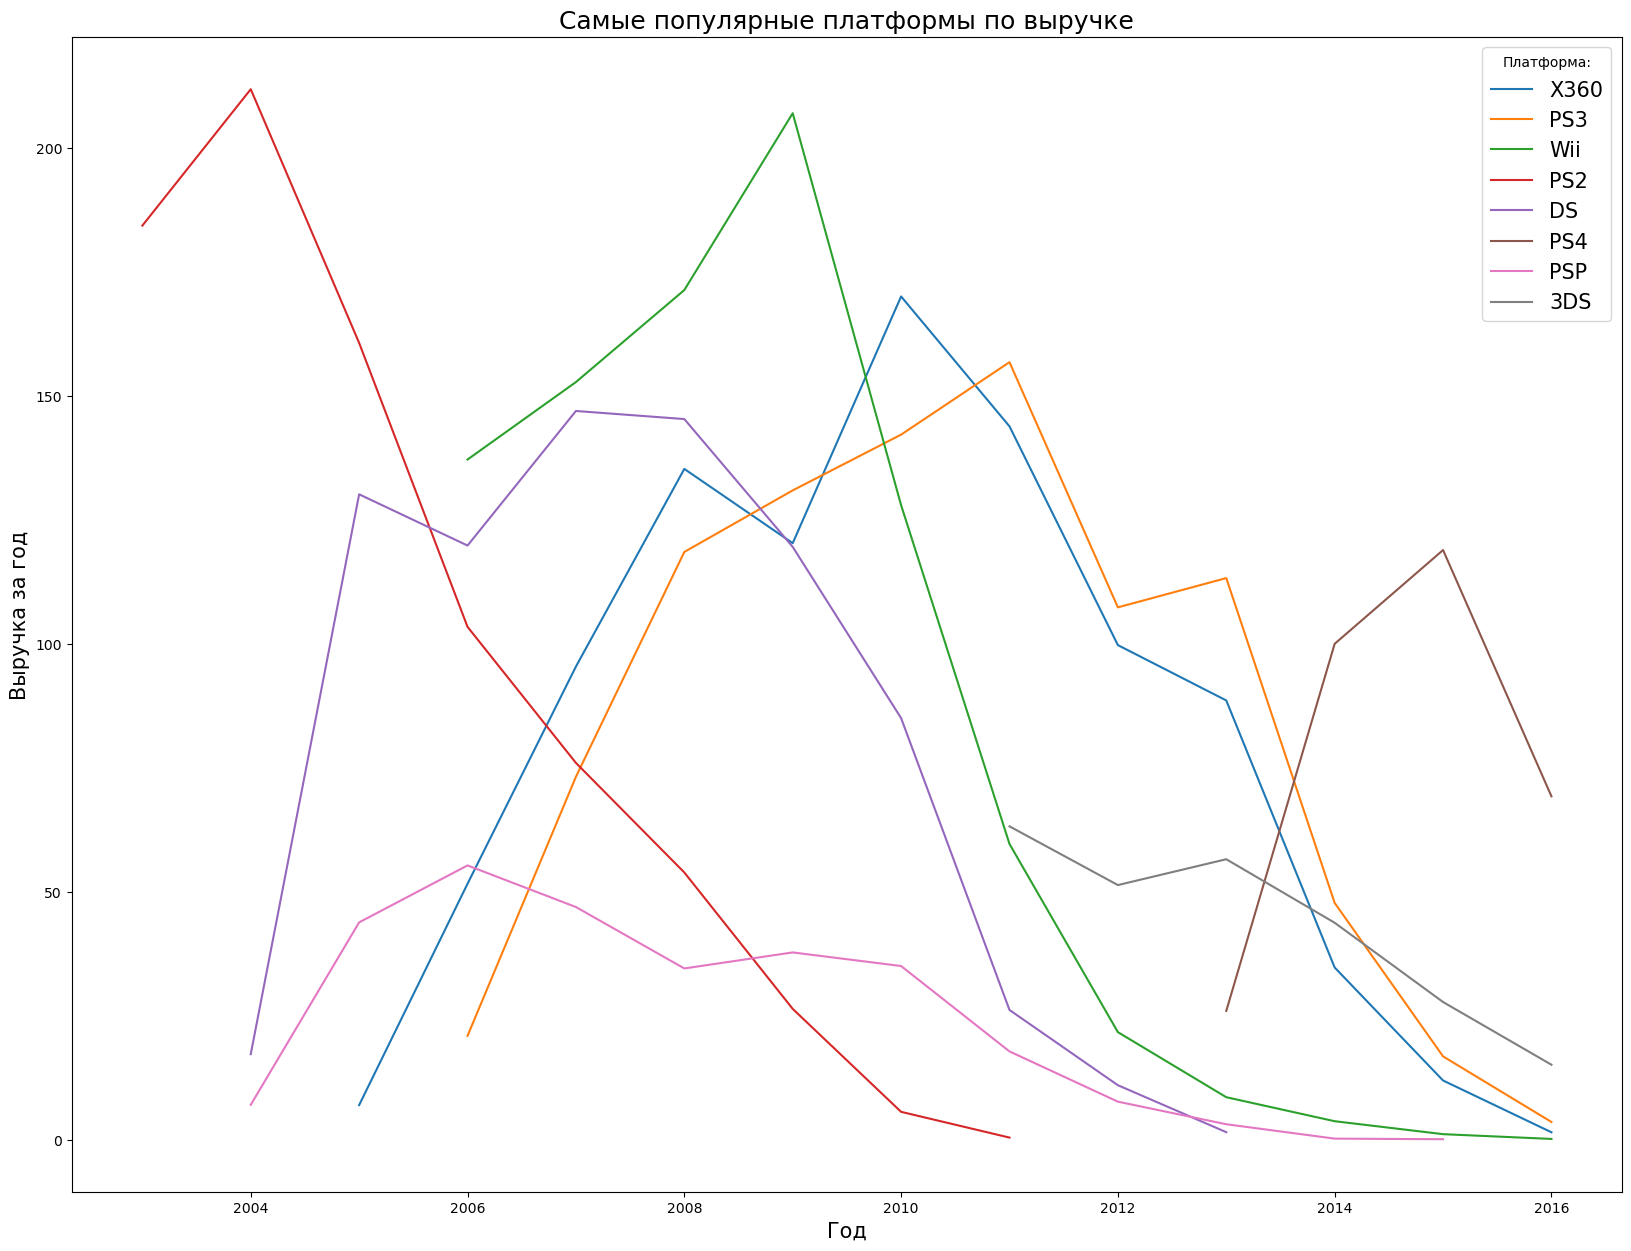

In [40]:
for platf in plat_sum:
    data.query('year_of_release >= 2003').loc[data['platform']==platf].groupby('year_of_release')['sum_sales'].sum()\
    .plot(y='sum', figsize=(20, 15))
    plt.title('Самые популярные платформы по выручке', fontsize=18)
    plt.legend(plat_sum, fontsize=15, title='Платформа:')
    plt.xlabel('Год', fontsize=15)
    plt.ylabel('Выручка за год', fontsize=15)

*Построив графики, мы можем сделать следующие выводы:*

* Такие платформы, как XB, PS2, DS, PSP к 2016 году уже утратили былую популярность, игры на них больше не выпускают.

* Срок популярности платформы - около 10 лет

* PS4 - новый явный лидер продаж, хотя игр на него пока вышло мало.

* PC имеет неплохую статистику по выпущенным играм, например за 2016 год PC занял первое место, но по продажам эта платформа не входит в топ-8. Возможно это связано с тем, что магазин не специализируется на продажах игр именно на компьютер. Если эта статистика применима и к другим магазинам, разработчикам игр стоит задуматься о болле прибыльнх платформах, например PS4

* Для прогнозирования выручки на 2017 будем брать данные с 2014 года.

In [41]:
data_new = data.query('year_of_release >= 2014').reset_index(drop=True)


In [42]:
data_new.groupby('platform')['sum_sales'].sum().sort_values(ascending=False).head(3)

platform
PS4     288.15
XOne    140.36
3DS      86.68
Name: sum_sales, dtype: float64

В последние годы стала пользоваться спросом платформа XOne, которая не попала на предыдущий график. Построим график с 3-мя самыми популярными платформами за последние 3 года.

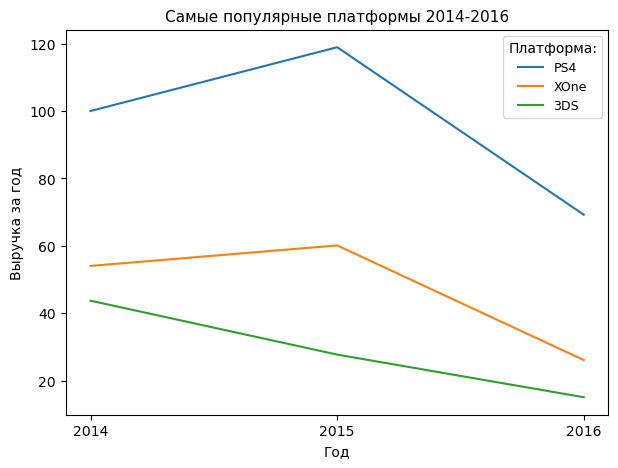

In [43]:
new_platforms = ['PS4', 'XOne', '3DS']
for platf in new_platforms:
    data_new.loc[data_new['platform']==platf].groupby('year_of_release')['sum_sales'].sum()\
    .plot(y='sum', figsize=(7, 5), xticks=([2014, 2015, 2016]))
    plt.title('Самые популярные платформы 2014-2016', fontsize=11)
    plt.xlabel('Год')
    plt.ylabel('Выручка за год')
    plt.legend(['PS4', 'XOne', '3DS'], fontsize=9, title='Платформа:')

### Диаграмма "ящик с усами" ###
<a id='step3_2'></a>
**Выводы**:
* Наибольшую медиану суммарных продаж имеют платформы: XOne, X360, WiiU, Wii, PS4

* Платформа Wii имеет самый высокий показатель 75% квартиля. К ней также близки PS4 и XOne.

* Самые высокии показатели 1,5*IQR имеют PS4, XOne

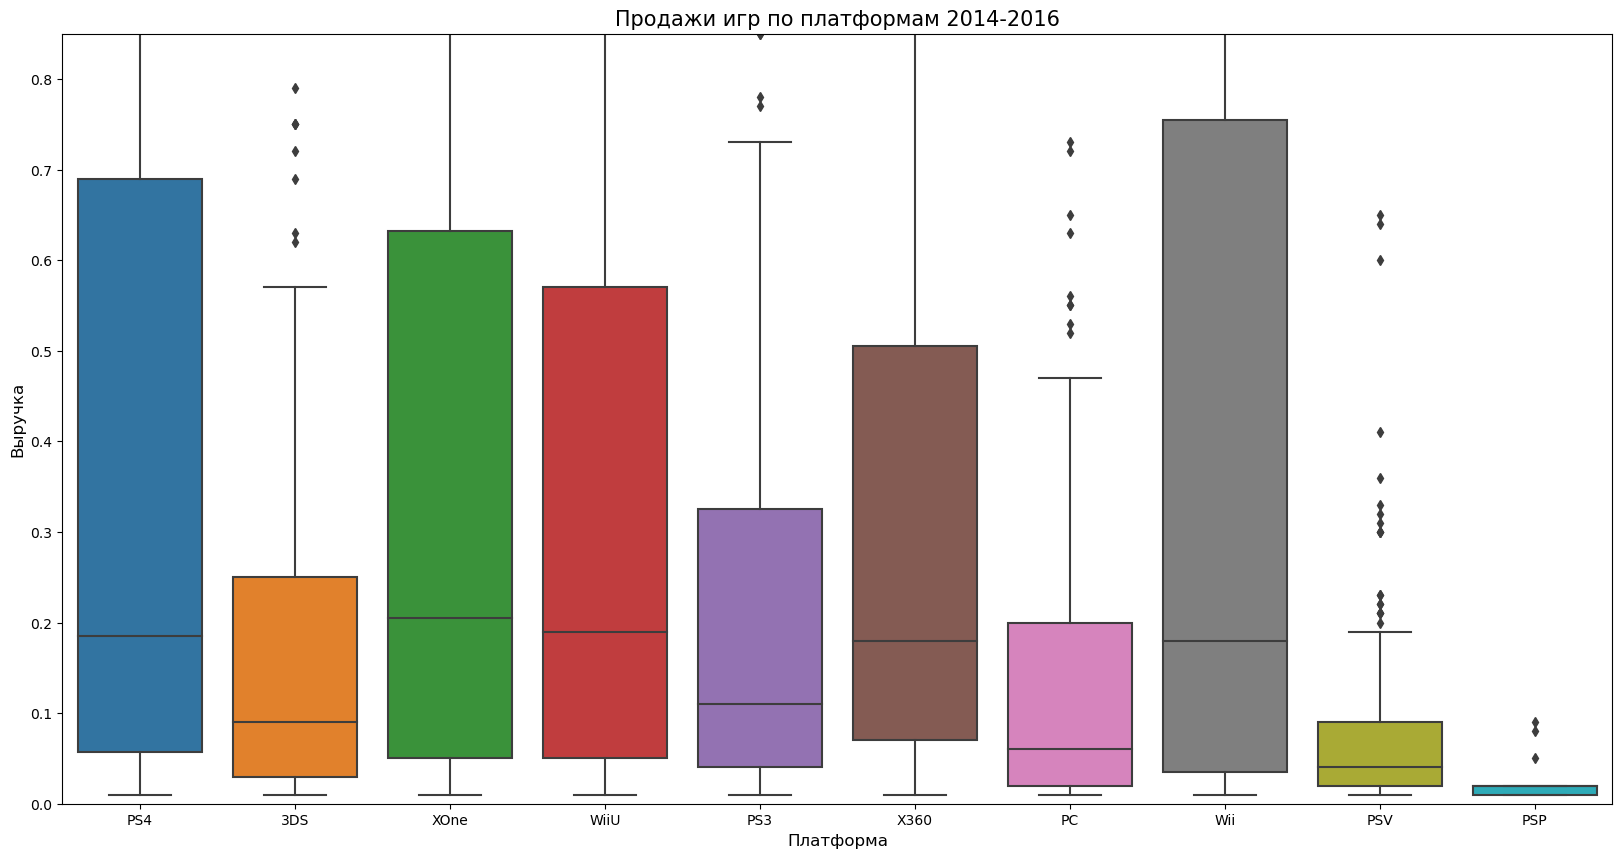

In [44]:
plt.figure(figsize=(20, 10))
sns.boxplot(x=data_new['platform'], y=data_new['sum_sales'])
plt.title('Продажи игр по платформам 2014-2016', fontsize=15)
plt.ylim(0, 0.85)
plt.xlabel('Платформа', fontsize=12)
plt.ylabel('Выручка', fontsize=12)
plt.show()

Посмотрим на верхнюю часть графика для того, чтобы определить у кого самый высокий показатель 1,5*IQR

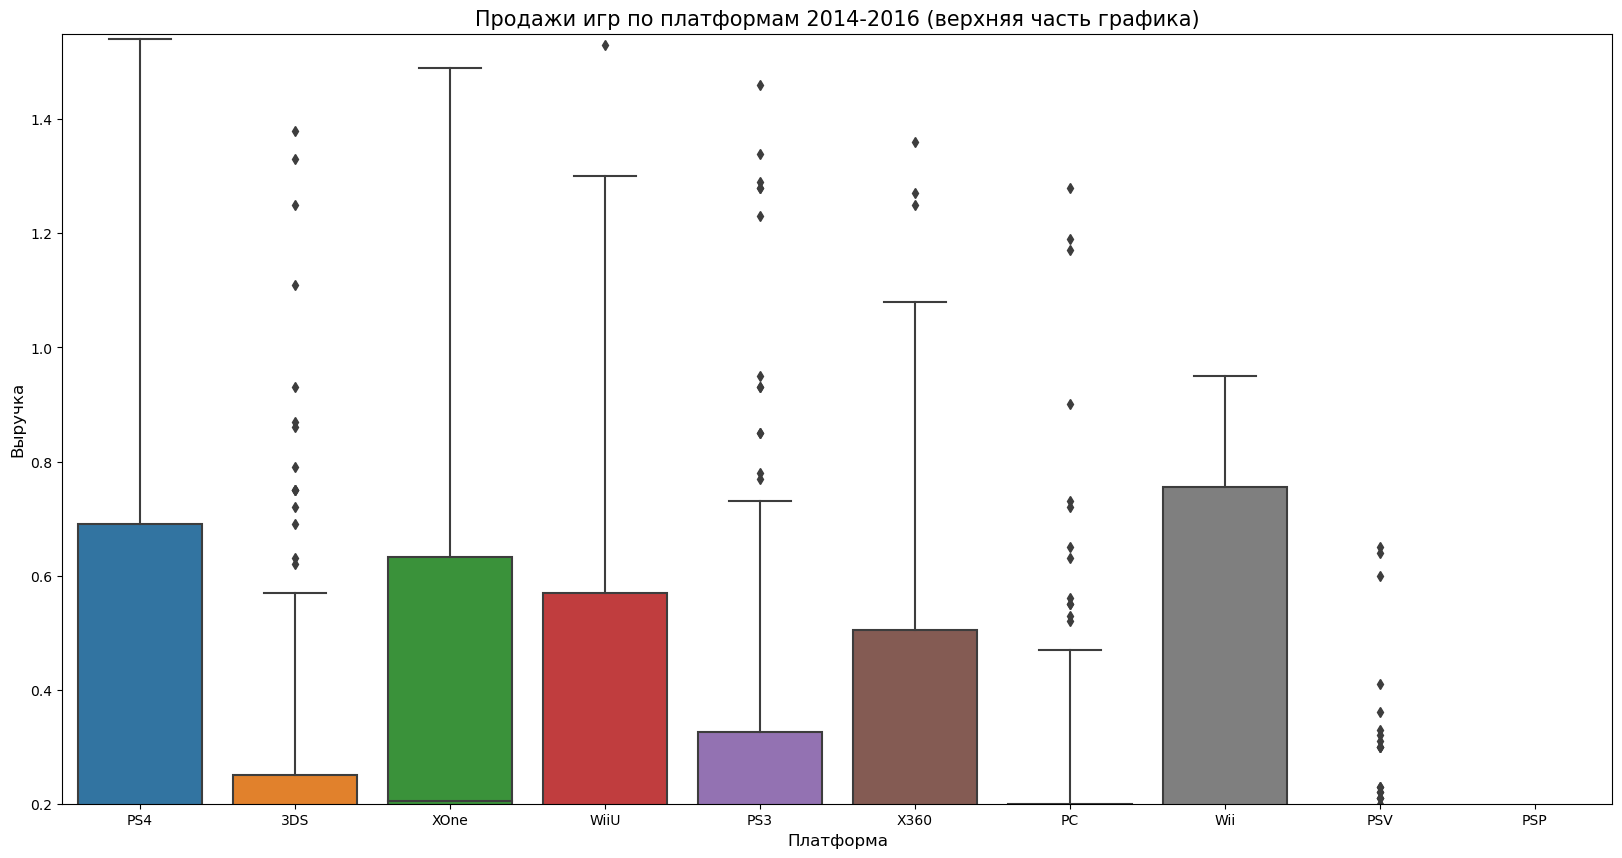

In [45]:
plt.figure(figsize=(20, 10))
sns.boxplot(x=data_new['platform'], y=data_new['sum_sales'])
plt.title('Продажи игр по платформам 2014-2016 (верхняя часть графика)', fontsize=15)
plt.ylim(0.2, 1.55)
plt.xlabel('Платформа', fontsize=12)
plt.ylabel('Выручка', fontsize=12)
plt.show()

In [46]:
data_new['sum_sales'].describe()

count    1689.000000
mean        0.431883
std         1.056109
min         0.010000
25%         0.030000
50%         0.100000
75%         0.350000
max        14.630000
Name: sum_sales, dtype: float64

<a id='step3_3'></a>
### Влияние отзывов пользователей и критиков ###

Построим диаграммы рассеяния по платформе PS4, XOne, 3DS.

Также применим коэффициент корреляции. В результате можем сделать вывод, что во всех платформах присутствует умеренная корреляция между выручкой и оценками критиков умеренная. Корреляция между выручкой и оценками пользователей либо отсутствует, либо выражена слабо.

**PS4**:

* **Оценка критиков.** Корреляция между выручкой и оценками критиков умеренная: 0.4026614106810408
* **Оценка пользователей.** Корреляция между выручкой и оценками пользователей отсутствует

**XOne**:

* **Оценка критиков.** Корреляция между выручкой и оценками критиков умеренная: 0.4286769437033321
* **Оценка пользователей.** Корреляция между выручкой и оценками пользователей отсутствует

**3DS**:

* **Оценка критиков.** Корреляция между выручкой и оценками критиков умеренная: 0.3141174928690511
* **Оценка пользователей.** Корреляция между выручкой и оценками пользователей слабая: 0.2151932718527028


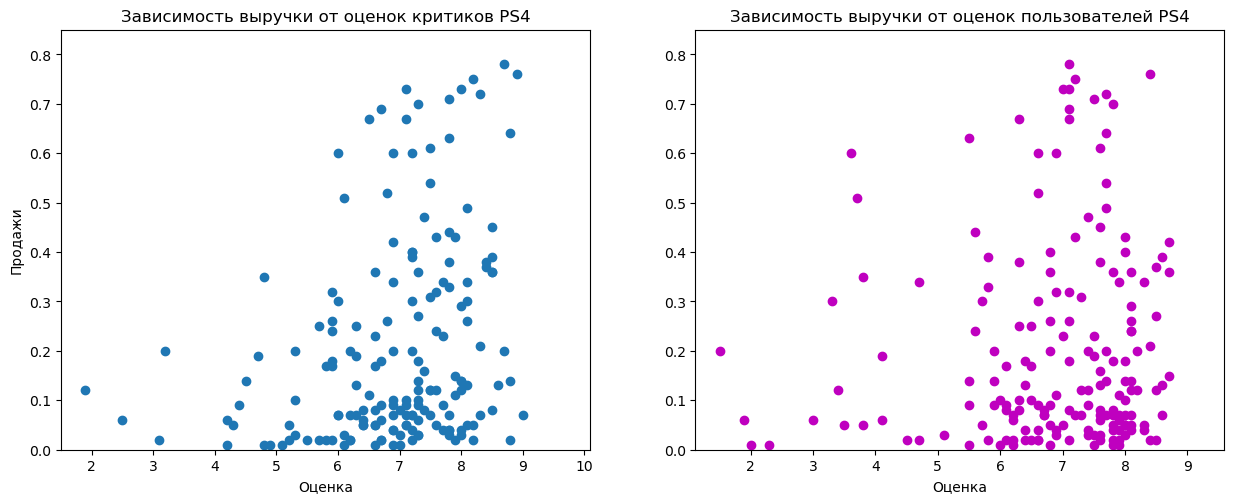

In [47]:
data_ps4 = data_new.loc[data_new['platform'] == 'PS4'].reset_index(drop=True)


plt.figure(figsize = (15, 12))

plt.subplot(2, 2, 1)
plt.plot(data_ps4['critic_score'], data_ps4['sum_sales'], 'o')
plt.ylim(0, 0.85)
plt.title('Зависимость выручки от оценок критиков PS4')
plt.xlabel('Оценка')
plt.ylabel('Продажи')
plt.subplot(2, 2, 2)
plt.plot(data_ps4['user_score'], data_ps4['sum_sales'], 'mo')
plt.ylim(0, 0.85)
plt.title('Зависимость выручки от оценок пользователей PS4')
plt.xlabel('Оценка')
plt.show()

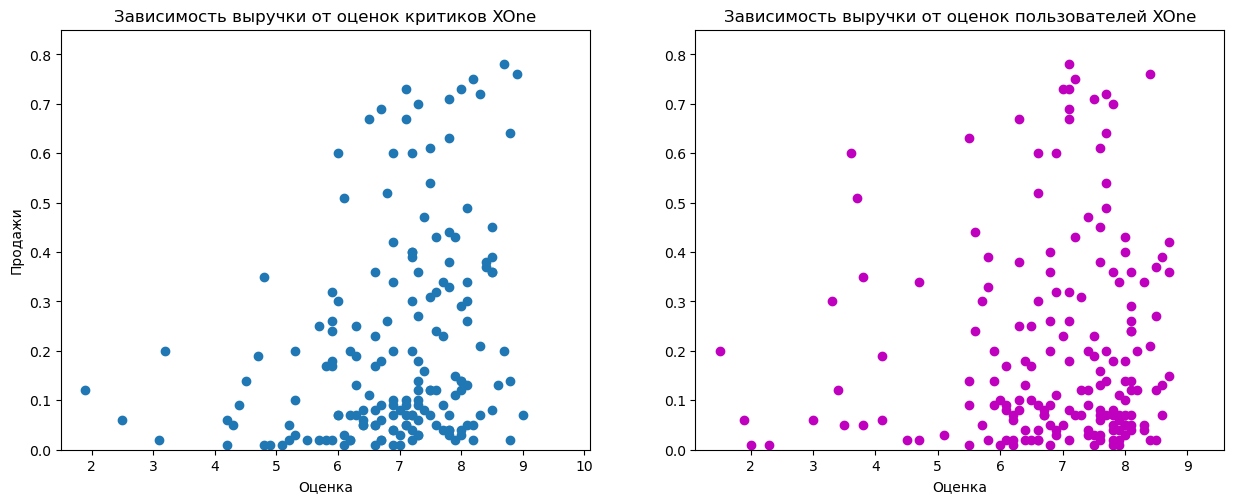

In [48]:
data_xone = data_new.loc[data_new['platform'] == 'XOne'].reset_index(drop=True)


plt.figure(figsize = (15, 12))

plt.subplot(2, 2, 1)
plt.plot(data_ps4['critic_score'], data_ps4['sum_sales'], 'o')
plt.ylim(0, 0.85)
plt.title('Зависимость выручки от оценок критиков XOne')
plt.xlabel('Оценка')
plt.ylabel('Продажи')
plt.subplot(2, 2, 2)
plt.plot(data_ps4['user_score'], data_ps4['sum_sales'], 'mo')
plt.ylim(0, 0.85)
plt.title('Зависимость выручки от оценок пользователей XOne')
plt.xlabel('Оценка')
plt.show()

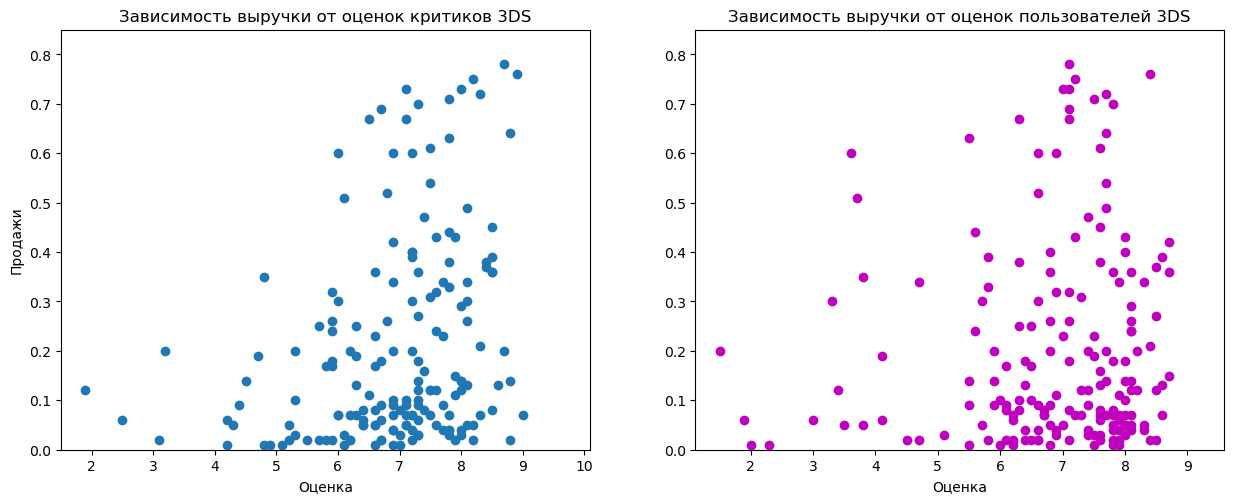

In [49]:
data_3ds = data_new.loc[data_new['platform'] == '3DS'].reset_index(drop=True)


plt.figure(figsize = (15, 12))

plt.subplot(2, 2, 1)
plt.plot(data_ps4['critic_score'], data_ps4['sum_sales'], 'o')
plt.ylim(0, 0.85)
plt.title('Зависимость выручки от оценок критиков 3DS')
plt.xlabel('Оценка')
plt.ylabel('Продажи')
plt.subplot(2, 2, 2)
plt.plot(data_ps4['user_score'], data_ps4['sum_sales'], 'mo')
plt.ylim(0, 0.85)
plt.title('Зависимость выручки от оценок пользователей 3DS')
plt.xlabel('Оценка')
plt.show()

In [50]:
print('Корреляция между выручкой и оценками критиков PS4:', data_ps4['critic_score'].corr(data_ps4['sum_sales']))
print('Корреляция между выручкой и оценками пользователей PS4:', data_ps4['user_score'].corr(data_ps4['sum_sales']))
print('Корреляция между выручкой и оценками критиков XOne:', data_xone['critic_score'].corr(data_xone['sum_sales']))
print('Корреляция между выручкой и оценками пользователей XOne:', data_xone['user_score'].corr(data_xone['sum_sales']))
print('Корреляция между выручкой и оценками критиков 3DS:',data_3ds['critic_score'].corr(data_3ds['sum_sales']))
print('Корреляция между выручкой и оценками пользователей 3DS:', data_3ds['user_score'].corr(data_3ds['sum_sales']))

Корреляция между выручкой и оценками критиков PS4: 0.4026614106810408
Корреляция между выручкой и оценками пользователей PS4: -0.040131589472697356
Корреляция между выручкой и оценками критиков XOne: 0.4286769437033321
Корреляция между выручкой и оценками пользователей XOne: -0.0703839280647581
Корреляция между выручкой и оценками критиков 3DS: 0.3141174928690511
Корреляция между выручкой и оценками пользователей 3DS: 0.2151932718527028


### Распределение игр по жанрам ###

<a id='step3_4'></a>
Построим столбчатые диаграммы по жанрам игр для выручки (по медиане) и количества выпущенных.

Выводы:
* Явный лидер по медианной выручке жанр - "Шутер", ближайшие конкуренты спорт и платформы отстают от него более чем в 2 раза.

* Топ-3 жанра по количеству выпущенных игр: экшн, ролевые, приключения, - показывают плохую статистику по медианным продажам, игр выпущено много, но большинство из них вызвало слабый интерес у пользователей. Приключения вовсе находятся на последнем месте - явно бесперспективное направление



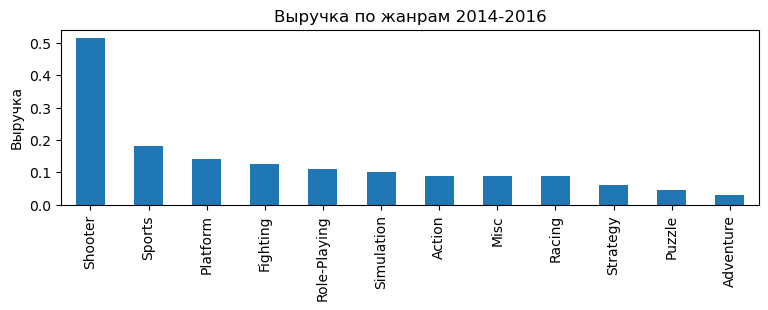

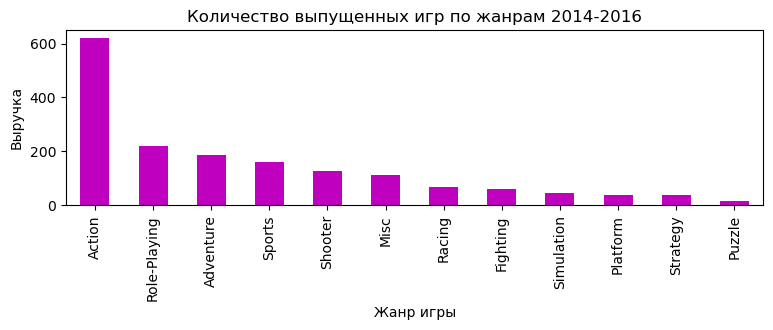

In [51]:
plt.figure(figsize=(9, 5))

plt.subplot(2, 1, 1)
data_new.groupby('genre')['sum_sales'].median().sort_values(ascending=False).plot(kind='bar')
plt.title('Выручка по жанрам 2014-2016')
plt.ylabel('Выручка')
plt.xlabel('')
plt.show()
plt.subplot(2, 1, 2)
data_new.groupby('genre')['sum_sales'].count().sort_values(ascending=False).plot(kind='bar', color='m', figsize=(9, 5))
plt.title('Количество выпущенных игр по жанрам 2014-2016')
plt.xlabel('Жанр игры')
plt.ylabel('Выручка')
plt.show()

## Шаг 4. Портрет пользователя каждого региона ##

<a id='step4'></a>
Построим диаграммы по регионам на основе продаж 2014-2016 гг.

**Платформы:**
* Во всех регионах кроме Японии самой популярной платформой является PS4.
* В Японии больше всего игр покупают для 3DS - японская платформа особенно популярна на внутреннем рынке. На втором месте - Wiiu.
* В Северной Америке прдпочтение отдают Wiiu, PS4 и XOne.
* В Европе и других странах лидирует PS4
* В Японии в отличие от других регионов набирает обороты недавно вышедшая PSV и вероятно в следующем году обгонит PS4.

**Жанры:**
* В Северной Америке, Европе и других странах больше всего пользуются спросом шутеры, платформы и спортивные игры.
* Самые популярные жанры в Японии - ролевые игры, платформы, файтинги и пазлы.
* Специфичные жанры: пазлы в Японии, гонки в Европе. Это стоит учесть при региональной рекламной компании.

**Возрастной рейтинг:**
* В Северной Америке, Европе и других странах больше всего игр покупают с возрастной категорией M (зрелые).
* В Японии больше всего продаж с индексом nan, возможно это связано с тем, что в Японии сущестсвуют свои возрастные рейтинги, и ESRB используется реже.

**Общий вывод:**
Для Северной Америке, Европы и других стран портрет пользователя по большей части идентичен: это пользователь PS4 или XOne, предпочитающий шутеры. В Японии ситуация отличается, геймеры используют 3DS и играют на нем в ролевые игры, платформы, файтинги, пазлы.

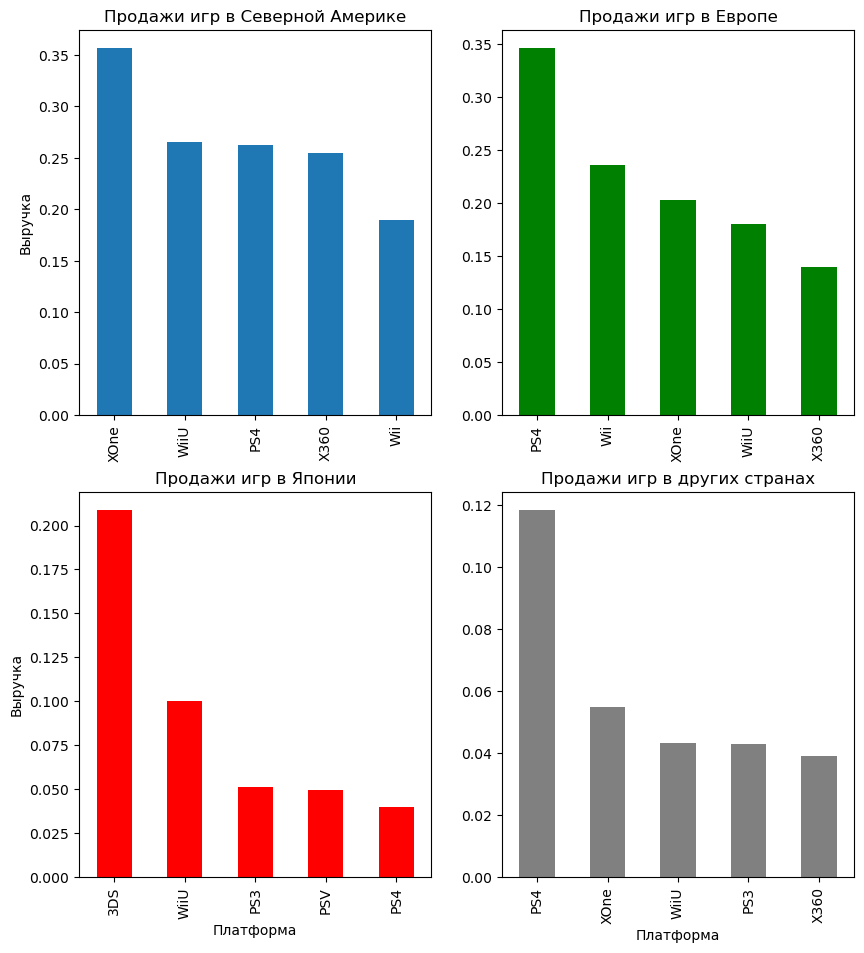

In [52]:
plt.figure(figsize=(10, 11))
plt.subplot(2, 2, 1)
data_new.groupby('platform')['na_sales'].mean().sort_values(ascending=False).head().plot(kind='bar')
plt.title('Продажи игр в Северной Америке')
plt.xlabel('')
plt.ylabel('Выручка')
plt.subplot(2, 2, 2)
data_new.groupby('platform')['eu_sales'].mean().sort_values(ascending=False).head().plot(kind='bar', color='green')
plt.title('Продажи игр в Европе')
plt.xlabel('')
plt.ylabel('')
plt.subplot(2, 2, 3)
data_new.groupby('platform')['jp_sales'].mean().sort_values(ascending=False).head().plot(kind='bar', color='red')
plt.title('Продажи игр в Японии')
plt.xlabel('Платформа')
plt.ylabel('Выручка')
plt.subplot(2, 2, 4)
data_new.groupby('platform')['other_sales'].mean().sort_values(ascending=False).head().plot(kind='bar', color='grey')
plt.title('Продажи игр в других странах')
plt.xlabel('Платформа')
plt.ylabel('')
plt.show()

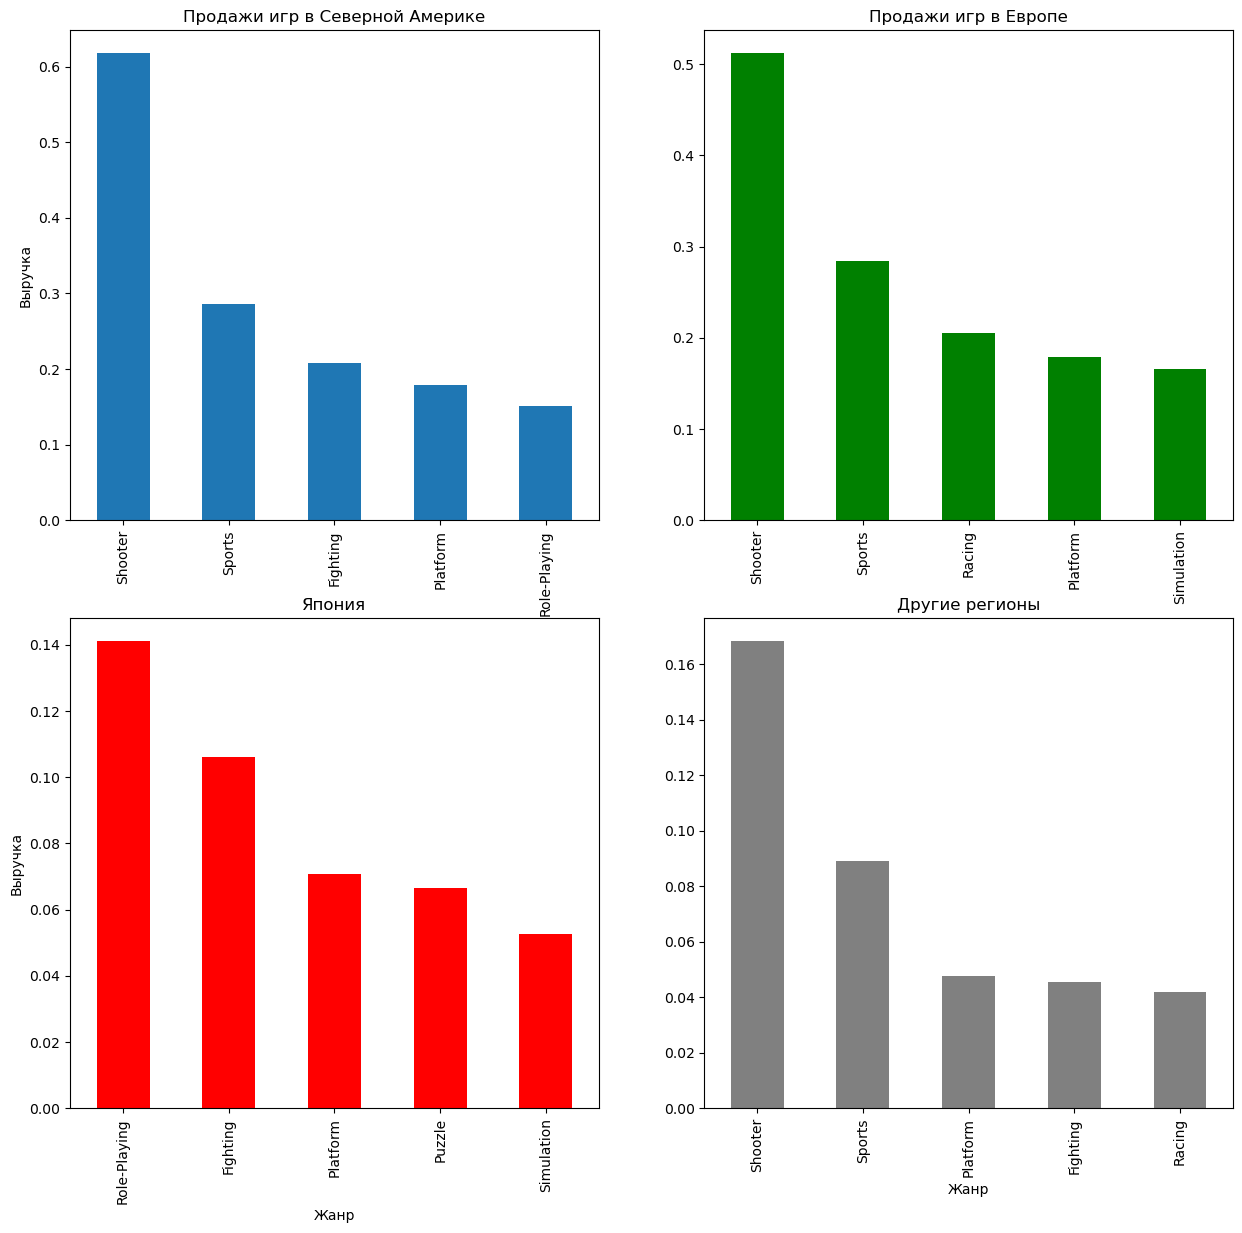

In [53]:
plt.figure(figsize=(15, 14))
plt.subplot(2, 2, 1)
data_new.groupby('genre')['na_sales'].mean().sort_values(ascending=False).head().plot(kind='bar')
plt.title('Продажи игр в Северной Америке')
plt.xlabel('')
plt.ylabel('Выручка')
plt.subplot(2, 2, 2)
data_new.groupby('genre')['eu_sales'].mean().sort_values(ascending=False).head().plot(kind='bar', color='green')
plt.title('Продажи игр в Европе')
plt.xlabel('')
plt.ylabel('')
plt.subplot(2, 2, 3)
data_new.groupby('genre')['jp_sales'].mean().sort_values(ascending=False).head().plot(kind='bar', color='red')
plt.title('Япония')
plt.xlabel('Жанр')
plt.ylabel('Выручка')
plt.subplot(2, 2, 4)
data_new.groupby('genre')['other_sales'].mean().sort_values(ascending=False).head().plot(kind='bar', color='grey')
plt.title('Другие регионы')
plt.xlabel('Жанр')
plt.ylabel('')
plt.show()

In [54]:
data_new['rating'].value_counts(dropna=False)

NaN     749
T       271
M       265
E       219
E10+    185
Name: rating, dtype: int64

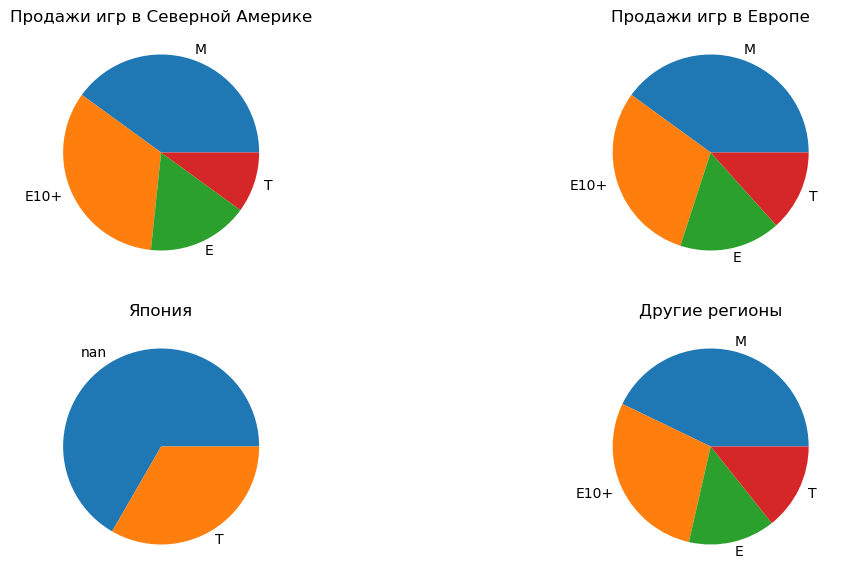

In [55]:
plt.figure(figsize=(13, 7))
plt.subplot(2, 2, 1)
data_new.groupby('rating', dropna=False)['na_sales'].median().sort_values(ascending=False).head().plot(kind='pie')
plt.title('Продажи игр в Северной Америке')
plt.xlabel('')
plt.ylabel('')
plt.subplot(2, 2, 2)
data_new.groupby('rating', dropna=False)['eu_sales'].median().sort_values(ascending=False).head().plot(kind='pie')
plt.title('Продажи игр в Европе')
plt.xlabel('')
plt.ylabel('')
plt.subplot(2, 2, 3)
data_new.groupby('rating', dropna=False)['jp_sales'].median().sort_values(ascending=False).head().plot(kind='pie')
plt.title('Япония')
plt.xlabel('')
plt.ylabel('')
plt.subplot(2, 2, 4)
data_new.groupby('rating', dropna=False)['other_sales'].median().sort_values(ascending=False).head().plot(kind='pie')
plt.title('Другие регионы')
plt.xlabel('')
plt.ylabel('')
plt.show()

## Шаг 5. Проверка гипотез ##


<a id='step5'></a>
H0: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

H1: Средние пользовательские рейтинги платформ Xbox One и PC не одинаковые

p-значение: 0.11601398086668832

У нас нет оснований полагать, что средние пользовательские рейтинги платформ Xbox One и PC отличаются при 5% уровне значимости.

In [56]:
alpha = .05
results = st.ttest_ind(data_new.loc[(data_new['platform']=='XOne') & (data_new['user_score']>0), 'user_score'],\
                                     data_new.loc[(data_new['platform']=='PC') & (data_new['user_score']>0), 'user_score'],\
                      equal_var = False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.11601398086668832
Не получилось отвергнуть нулевую гипотезу


H0: Средние пользовательские рейтинги жанров Action и Sports одинаковые

H1: Средние пользовательские рейтинги жанров Action и Sports не одинаковые

p-значение: 1.1825550382644557e-14

Отвергаем нулевую гипотезу, средние пользовательские рейтинги жанров Action и Sports отличаются при 5% уровне значимости.

In [57]:
alpha = .05
results = st.ttest_ind(data_new.loc[(data_new['genre']=='Action') & (data_new['user_score']>0), 'user_score'],\
                                     data_new.loc[(data_new['genre']=='Sports') & (data_new['user_score']>0), 'user_score'],\
                      equal_var = False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.1825550382644557e-14
Отвергаем нулевую гипотезу


# Шаг 6. Общий вывод ##

<a id='step6'></a>

В результате проведенного нами исследования можно сделать следующие выводы:

* Самыми популярными платформами в последние годы являются PS4, XOne, 3DS.
* Недавно вышедшая PSV набирает обороты на рынке. Наш прогноз - в 2017 году ее доля на рынке вырастет.
* Средний срок популярности платформы - примерно 10 лет.
* Наибольшую медиану суммарных продаж имеют платформы: PS4, XOne, X360, WiiU, Wii.
* Присутствует умеренная корреляция между выручкой и оценками критиков. Корреляция между выручкой и оценками пользователей отсутсвует.
* Явный лидер (медианная выручка) по жанрам - Шутеры.
* В Северной Америке, Европе и других странах больше всего игр покупают с возрастной категорией M (зрелые). В Японии больше всего продаж с nan.
* Для Северной Америке, Европы и других стран портрет пользователя по большей части идентичен: это пользователь PS4 или XOne, предпочитающий шутеры. В Японии ситуация отличается, геймеры используют 3DS и играют на нем в ролевые игры, платформы, файтинги, пазлы.

**Рекомендации магазину "Стримчик":**

* **Платформы**. Сделать акцент на продажи игр на PS4, XOne, Wiiu и 3DS(для японского рынка). В Северной Америке - больший уклон в сторону XOne, в Европе и других странах - PS4. Также стоит уделить внимание PSV, возможному преемнику PS4.

* **Жанры**. Наибольшее внимание в рекламной компании кроме Японии уделить **шутерам**, а также для Северной Америке - спортивным и файтингам, для Европы - спортивным и гонкам, для остальных - спортивным и плафтормам. В Японии ситуация отличается: там следует сделать акцент на ролевых, файтингах и платформах, а также пазлам, так как японцы - основные потребители этого жанра.
